In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity

#from google.colab import drive

In [41]:
#drive.mount('/content/drive')
#root_file_path = '/content/drive/My Drive/3 trimestre/Big data/Semana 6/beer_reviews.csv'
root_file_path = 'beer_reviews.csv'
beers_df = pd.read_csv('beer_reviews.csv')
beers_df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [5]:
beers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1048575 non-null  int64  
 1   brewery_name        1048566 non-null  object 
 2   review_time         1048575 non-null  int64  
 3   review_overall      1048575 non-null  float64
 4   review_aroma        1048575 non-null  float64
 5   review_appearance   1048575 non-null  float64
 6   review_profilename  1048340 non-null  object 
 7   beer_style          1048575 non-null  object 
 8   review_palate       1048575 non-null  float64
 9   review_taste        1048575 non-null  float64
 10  beer_name           1048575 non-null  object 
 11  beer_abv            1005757 non-null  float64
 12  beer_beerid         1048575 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 104.0+ MB


In [6]:
beers_df.describe().T

,count,mean,std,min,25%,50%,75%,max
brewery_id,1048575.0,3.186468e+03,5.606189e+03,1.000000e+00,1.470000e+02,4.470000e+02,2.432000e+03,2.800300e+04
review_time,1048575.0,1.226420e+09,7.569914e+07,8.406720e+08,1.177428e+09,1.241940e+09,1.289687e+09,1.326285e+09
review_overall,1048575.0,3.830223e+00,7.061915e-01,0.000000e+00,3.500000e+00,4.000000e+00,4.500000e+00,5.000000e+00
review_aroma,1048575.0,3.757360e+00,6.808592e-01,1.000000e+00,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_appearance,1048575.0,3.859627e+00,6.011164e-01,0.000000e+00,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_palate,1048575.0,3.762308e+00,6.654326e-01,1.000000e+00,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_taste,1048575.0,3.812399e+00,7.146751e-01,1.000000e+00,3.500000e+00,4.000000e+00,4.500000e+00,5.000000e+00
beer_abv,1005757.0,7.065410e+00,2.316903e+00,1.000000e-02,5.300000e+00,6.500000e+00,8.500000e+00,5.770000e+01
beer_beerid,1048575.0,2.271779e+04,2.209834e+04,3.000000e+00,1.911000e+03,1.623400e+04,4.104300e+04,7.731600e+04


In [7]:
beers_df.describe(include='object').T

,count,unique,top,freq
brewery_name,1048566,3793,Boston Beer Company (Samuel Adams),39444
review_profilename,1048340,28761,northyorksammy,3763
beer_style,1048575,104,American IPA,83617
beer_name,1048575,37770,Sierra Nevada Celebration Ale,3000


In [8]:
total_reviews = len(beers_df)
n_beers = beers_df['beer_name'].nunique()
n_users = beers_df['review_profilename'].nunique()

print('Total of reviews', total_reviews)
print('Total of unique beers', n_beers)
print('Total of unique users', n_users)
print('Mean of users reviews', round(total_reviews / n_users, 2))
print('Mean of beers reviews', round(total_reviews / n_beers, 2))

Total of reviews 1048575
Total of unique beers 37770
Total of unique users 28761
Mean of users reviews 36.46
Mean of beers reviews 27.76


In [9]:
beers_df[['beer_style']].groupby('beer_style').nunique()

""
beer_style
Altbier
American Adjunct Lager
American Amber / Red Ale
American Amber / Red Lager
American Barleywine
...
Vienna Lager
Weizenbock
Wheatwine


In [10]:
beers_df[['beer_name']].groupby('beer_name').nunique()

""
beer_name
! (Old Ale)
"""100"" Pale Ale"
"""12"" Belgian Golden Strong Ale"
"""33"" Export"
"""4"" Horse Oatmeal Stout"
...
Švyturys Nefiltruotas Raw
Žamberecký Kanec 14°
Žamberecký Kanec Imperial Stout


In [11]:
beers_df['beer_abv'].nunique()

423

In [12]:
beer_style_counter = Counter(beer_style for beer_style in beers_df['beer_style'])
print(f'beer style {len(beer_style_counter)}')
beer_style_counter

beer style 104


Counter({'Hefeweizen': 20402,
         'English Strong Ale': 2509,
         'Foreign / Export Stout': 3186,
         'German Pilsener': 12628,
         'American Double / Imperial IPA': 52934,
         'Herbed / Spiced Beer': 5529,
         'Light Lager': 6151,
         'Oatmeal Stout': 12270,
         'American Pale Lager': 5941,
         'Rauchbier': 3343,
         'American Pale Ale (APA)': 41192,
         'American Porter': 33947,
         'Belgian Strong Dark Ale': 23123,
         'American IPA': 83617,
         'American Stout': 17068,
         'Russian Imperial Stout': 34290,
         'American Amber / Red Ale': 32720,
         'American Strong Ale': 24841,
         'Märzen / Oktoberfest': 16537,
         'American Adjunct Lager': 19514,
         'American Blonde Ale': 7677,
         'Euro Pale Lager': 10110,
         'English Brown Ale': 13229,
         'Scotch Ale / Wee Heavy': 10746,
         'Fruit / Vegetable Beer': 22367,
         'American Double / Imperial Stout': 39807,

In [13]:
print(f'top 10 beer styles \n {beer_style_counter.most_common(10)}')

top 10 beer styles 
 [('American IPA', 83617), ('American Double / Imperial IPA', 52934), ('American Pale Ale (APA)', 41192), ('American Double / Imperial Stout', 39807), ('Russian Imperial Stout', 34290), ('American Porter', 33947), ('American Amber / Red Ale', 32720), ('American Strong Ale', 24841), ('Belgian Strong Dark Ale', 23123), ('Fruit / Vegetable Beer', 22367)]


En el top ten los estilos de cerveza:
`American IPA`, `American Double / Imperial IPA`, `American Pale Ale`, `Russian Imperial Stout`, `American Double / Imperial Stout`, `American Porter`, `American Amber / Red Ale`, `Belgian String Dark Ale`, `Fruit / Vegetable beer` and `American Strong Ale`


<ipython-input-14-b53e815eeccd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='beer_style', y='count', data=beer_style_counts_df, palette='rocket')


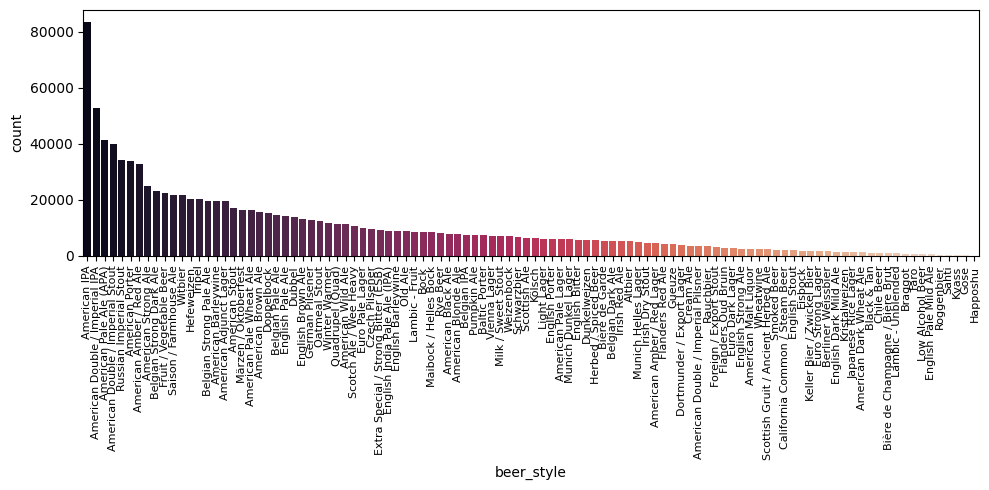

In [14]:
beer_style_counts_df = pd.DataFrame([beer_style_counter]).T.reset_index()
beer_style_counts_df.columns = ['beer_style', 'count']
beer_style_counts_df = beer_style_counts_df.sort_values(by='count', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x='beer_style', y='count', data=beer_style_counts_df, palette='rocket')
plt.xticks(rotation=90, fontsize=8)

plt.tight_layout()
plt.show()

Generamos el dataframe con las cervezas que solo tienen una evaluacion para eliminarlas del dataset y reducir el numero de cervezas para poder realizar la matriz de similitudes

In [20]:
beers = beers_df['beer_beerid'].value_counts().to_frame().reset_index()
beers = beers[beers['count'] ==1]
beers

,beer_beerid,count
27479,36743,1
27480,68903,1
27481,63103,1
27482,44244,1
27483,18481,1
...,...,...
42714,28994,1
42715,27948,1
42716,36022,1
42717,73107,1


In [21]:
beers_df_mat = beers_df[~beers_df['beer_beerid'].isin(beers['beer_beerid'])]
beers_df_mat

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
5,1075,Caldera Brewing Company,1325524659,3.0,3.5,3.5,oline73,Herbed / Spiced Beer,3.0,3.5,Caldera Ginger Beer,4.7,52159
6,1075,Caldera Brewing Company,1318991115,3.5,3.5,3.5,Reidrover,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159
7,1075,Caldera Brewing Company,1306276018,3.0,2.5,3.5,alpinebryant,Herbed / Spiced Beer,2.0,3.5,Caldera Ginger Beer,4.7,52159
8,1075,Caldera Brewing Company,1290454503,4.0,3.0,3.5,LordAdmNelson,Herbed / Spiced Beer,3.5,4.0,Caldera Ginger Beer,4.7,52159
9,1075,Caldera Brewing Company,1285632924,4.5,3.5,5.0,augustgarage,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,710,Jacob Leinenkugel Brewing Company,1198796787,3.5,2.0,2.0,steelisreal,Fruit / Vegetable Beer,3.0,3.5,Leinenkugel's Berry Weiss,4.7,2967
1048571,710,Jacob Leinenkugel Brewing Company,1197426255,3.0,4.0,2.5,nsmartell,Fruit / Vegetable Beer,3.5,3.5,Leinenkugel's Berry Weiss,4.7,2967
1048572,710,Jacob Leinenkugel Brewing Company,1196399474,3.0,3.0,4.0,vickersspitfire,Fruit / Vegetable Beer,2.5,3.0,Leinenkugel's Berry Weiss,4.7,2967
1048573,710,Jacob Leinenkugel Brewing Company,1195350983,3.0,3.0,3.0,Pegasus,Fruit / Vegetable Beer,3.0,3.0,Leinenkugel's Berry Weiss,4.7,2967


Eliminamos registros duplicados dado que una sola cerveza no cambia su nivel de alcohol ni categoria.

In [22]:
beers_df_mat = beers_df_mat[['beer_beerid','beer_abv','beer_style']].drop_duplicates()
beers_df_mat=beers_df_mat.set_index('beer_beerid')
beers_df_mat


,beer_abv,beer_style
beer_beerid,,
52159,4.7,Herbed / Spiced Beer
436,3.5,Light Lager
10789,7.2,Oatmeal Stout
58046,7.4,Rauchbier
25414,5.5,American Pale Ale (APA)
...,...,...
5757,5.1,Märzen / Oktoberfest
641,8.0,American Strong Ale
2967,4.7,Fruit / Vegetable Beer


dividimos el nivel de alcohol en categorias para reducir el numero de valores a 4 rangos

In [23]:

bins = [0, 5, 8, 12, 58]
labels = ['Low', 'Medium', 'High', 'Very High']

beers_df_mat['abv_category'] = pd.cut(beers_df_mat['beer_abv'], bins=bins, labels=labels, right=False)
beers_df_mat[['beer_abv','abv_category']]


,beer_abv,abv_category
beer_beerid,,
52159,4.7,Low
436,3.5,Low
10789,7.2,Medium
58046,7.4,Medium
25414,5.5,Medium
...,...,...
5757,5.1,Medium
641,8.0,High
2967,4.7,Low


In [24]:
beers_df_mat = pd.get_dummies(beers_df_mat[['abv_category','beer_style']])


In [25]:
beers_df_mat

,abv_category_Low,abv_category_Medium,abv_category_High,abv_category_Very High,beer_style_Altbier,beer_style_American Adjunct Lager,beer_style_American Amber / Red Ale,beer_style_American Amber / Red Lager,beer_style_American Barleywine,beer_style_American Black Ale,...,beer_style_Scotch Ale / Wee Heavy,beer_style_Scottish Ale,beer_style_Scottish Gruit / Ancient Herbed Ale,beer_style_Smoked Beer,beer_style_Tripel,beer_style_Vienna Lager,beer_style_Weizenbock,beer_style_Wheatwine,beer_style_Winter Warmer,beer_style_Witbier
beer_beerid,,,,,,,,,,,,,,,,,,,,,
52159,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
436,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10789,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
58046,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25414,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5757,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
641,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2967,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
cosine_sim = cosine_similarity(beers_df_mat, beers_df_mat)
print(f"Las dimensiones de similaridad coseno de las caracteristicas de nuestra matriz de similitud son: {cosine_sim.shape}")

Las dimensiones de similaridad coseno de las caracteristicas de nuestra matriz de similitud son: (27479, 27479)


In [30]:
numero_recomendaciones=10
sim_scores = list(enumerate(cosine_sim[0]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores = sim_scores[1:(numero_recomendaciones+1)]
similar_beers = [i[0] for i in sim_scores]

In [40]:
similar_beers

[676, 677, 995, 1050, 1151, 2040, 2621, 2904, 2906, 2972]

informacion de la cerveza buscada

In [37]:
beers_df[beers_df['beer_beerid']==52159][['beer_beerid','beer_style','beer_abv','beer_name']].drop_duplicates()

,beer_beerid,beer_style,beer_abv,beer_name
5,52159,Herbed / Spiced Beer,4.7,Caldera Ginger Beer


Dataframe de informacion de las cervezas

In [38]:
beers_info = beers_df[['beer_beerid','beer_style','beer_abv','beer_name']].drop_duplicates()

desplegando info de los 10 resultados basados en la matriz de similitudes

In [42]:
beers_info[beers_info['beer_beerid'].isin(similar_beers)]

,beer_beerid,beer_style,beer_abv,beer_name
100277,2621,English India Pale Ale (IPA),6.3,Old Slipperyskin India Pale Ale
435167,1151,English Brown Ale,5.3,Lakeside British Ale
473990,2906,American IPA,6.7,Butte Creek Organic India Pale Ale
661021,2040,Kölsch,4.8,Reissdorf Kölsch
762184,995,Maibock / Helles Bock,6.0,Mai Bock
